<a href="https://colab.research.google.com/github/xaabizulu/24_25_3_R10_Verde_Oscuro/blob/main/02__Grafo_Colabs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [208]:
import pandas as pd
import networkx as nx
from itertools import combinations
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random
import numpy as np
import plotly.graph_objects as go

In [209]:
#ESTO ES PARA EJECUTAR EN COLAB
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [210]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/GRAFO RETO/Datos/transformados/df_resultado.csv')
# df = pd.read_csv('Datos/transformados/df_resultado.csv')
df.pop('Unnamed: 0')
df.head()

,id_variant,id,title,season,hexadecimal,family_id,id_hex,weather,nivel,formalidad,...,foulard_type,size,skirt_type,message,hood,back_neckline,shoulders_pad,bag_type,hips_volume,chest_volume
0,fbc2f719-e038-4243-892c-7bd2ca6e80b5,5f5c4a50-557a-4d53-9e81-cc72fdd18fbf,Onljade Cardigan knit,8,000000,141f32d6-a5af-49bf-b019-fd28354977f1,5f5c4a50-557a-4d53-9e81-cc72fdd18fbf_000000,cold,3.0,Formal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,c85666c0-a8ba-42f4-a30f-17687ad51ff5,5f5c4a50-557a-4d53-9e81-cc72fdd18fbf,Onljade Cardigan knit,8,DFC8B2,141f32d6-a5af-49bf-b019-fd28354977f1,5f5c4a50-557a-4d53-9e81-cc72fdd18fbf_DFC8B2,cold,3.0,Formal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,93db9797-3a66-4889-be9c-5d3522da96a1,5f5c4a50-557a-4d53-9e81-cc72fdd18fbf,Onljade Cardigan knit,8,B94600,141f32d6-a5af-49bf-b019-fd28354977f1,5f5c4a50-557a-4d53-9e81-cc72fdd18fbf_B94600,cold,3.0,Formal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0c1010aa-2f25-4c55-9f95-b9bc133f3307,6e6b4255-006a-4d13-b312-3b1426290d8e,Poly Pant deeluxe,7,B11730,6598b655-3e19-448c-8b4f-ff6a29447b34,6e6b4255-006a-4d13-b312-3b1426290d8e_B11730,warm,1.1,Formal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,215a323c-9721-4879-9aa6-5cf30b5b21f0,6549c1b1-989e-432a-bdc9-b603c438b310,Onleden Sweater knt,9,FFFF00,1b93b30c-833f-45a8-ba69-c21d2e7f4824,6549c1b1-989e-432a-bdc9-b603c438b310_FFFF00,warm,3.0,Informal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [211]:
color_combinations = pd.read_csv('/content/drive/My Drive/Colab Notebooks/GRAFO RETO/combinaciones_colores.csv')
# color_combinations = pd.read_csv('combinaciones_colores.csv')

In [212]:
df_s7 = df[df['season']==7]
df_s8 = df[df['season']==8]
df_s9 = df[df['season']==9]

**GRAFO**

- Eliminar columnas : top_type, finishing, closing, neck, detail, sleeve, sleeve_long, sizing, composition,  fabric, hip_contour, waist_contour, chest_contour, sleeve_long_cm, long_cm, gripper, basic, down_part_type, bottom, type_of_length, neckline, outside_type, cover, light, alerts, cut, rubber_waist, label, dress_type, foulard_type, size, skirt_type, message, hood, back_neckline, shoulders_pad, bag_type, hips_volume, chest_volume, shot, thickness

In [213]:
columnas_a_eliminar = [
    'top_type', 'finishing', 'closing', 'neck', 'detail', 'sleeve', 'sleeve_long', 'sizing',
    'composition', 'fabric', 'hip_contour', 'waist_contour', 'chest_contour', 'sleeve_long_cm',
    'long_cm', 'gripper', 'basic', 'down_part_type', 'bottom', 'type_of_length', 'neckline',
    'outside_type', 'cover', 'light', 'alerts', 'cut', 'rubber_waist', 'label', 'dress_type',
    'foulard_type', 'size', 'skirt_type', 'message', 'hood', 'back_neckline', 'shoulders_pad',
    'bag_type', 'hips_volume', 'chest_volume', 'shot', 'thicknees', 'weather.1', 'id_hex'
]

df_limpio = df.drop(columns=columnas_a_eliminar)


In [214]:
df_limpio.head()

,id_variant,id,title,season,hexadecimal,family_id,weather,nivel,formalidad,adventurous,print,style,fit,application
0,fbc2f719-e038-4243-892c-7bd2ca6e80b5,5f5c4a50-557a-4d53-9e81-cc72fdd18fbf,Onljade Cardigan knit,8,000000,141f32d6-a5af-49bf-b019-fd28354977f1,cold,3.0,Formal,1,smooth,classic,straight,freetime
1,c85666c0-a8ba-42f4-a30f-17687ad51ff5,5f5c4a50-557a-4d53-9e81-cc72fdd18fbf,Onljade Cardigan knit,8,DFC8B2,141f32d6-a5af-49bf-b019-fd28354977f1,cold,3.0,Formal,1,smooth,classic,straight,freetime
2,93db9797-3a66-4889-be9c-5d3522da96a1,5f5c4a50-557a-4d53-9e81-cc72fdd18fbf,Onljade Cardigan knit,8,B94600,141f32d6-a5af-49bf-b019-fd28354977f1,cold,3.0,Formal,1,smooth,classic,straight,freetime
3,0c1010aa-2f25-4c55-9f95-b9bc133f3307,6e6b4255-006a-4d13-b312-3b1426290d8e,Poly Pant deeluxe,7,B11730,6598b655-3e19-448c-8b4f-ff6a29447b34,warm,1.1,Formal,1,smooth,street,tight,freetime
4,215a323c-9721-4879-9aa6-5cf30b5b21f0,6549c1b1-989e-432a-bdc9-b603c438b310,Onleden Sweater knt,9,FFFF00,1b93b30c-833f-45a8-ba69-c21d2e7f4824,warm,3.0,Informal,1,smooth,boho,loose,freetime


In [215]:
df_limpio['id_nodo'] = range(len(df))

G = nx.Graph()

for _, row in df_limpio.iterrows():
    G.add_node(row['id_nodo'], feature=[
        row['season'], row['hexadecimal'], row['weather'],
        row['nivel'], row['formalidad'], row['adventurous'], row['print'], row['style'],
        row['fit'], row['application']
    ], label=row['id_nodo'])


for node in G.nodes(data=True):
    print(node)

(0, {'feature': [8, '000000', 'cold', 3.0, 'Formal', 1, 'smooth', 'classic', 'straight', 'freetime'], 'label': 0})
(1, {'feature': [8, 'DFC8B2', 'cold', 3.0, 'Formal', 1, 'smooth', 'classic', 'straight', 'freetime'], 'label': 1})
(2, {'feature': [8, 'B94600', 'cold', 3.0, 'Formal', 1, 'smooth', 'classic', 'straight', 'freetime'], 'label': 2})
(3, {'feature': [7, 'B11730', 'warm', 1.1, 'Formal', 1, 'smooth', 'street', 'tight', 'freetime'], 'label': 3})
(4, {'feature': [9, 'FFFF00', 'warm', 3.0, 'Informal', 1, 'smooth', 'boho', 'loose', 'freetime'], 'label': 4})
(5, {'feature': [9, 'ECE9D6', 'warm', 3.0, 'Informal', 1, 'smooth', 'boho', 'loose', 'freetime'], 'label': 5})
(6, {'feature': [9, '00008b', 'warm', 3.0, 'Informal', 1, 'smooth', 'boho', 'loose', 'freetime'], 'label': 6})
(7, {'feature': [8, '00008b', 'warm', 3.1, 'Informal', 2, 'floral', 'street', 'loose', 'freetime'], 'label': 7})
(8, {'feature': [8, '000000', 'warm', 3.1, 'Informal', 2, 'floral', 'street', 'loose', 'freetime']

In [216]:
# Comprobar que todos los nodos tienen el mismo número de features
feature_length = None
all_equal = True

for node, data in G.nodes(data=True):
    current_length = len(data['feature'])

    if feature_length is None:
        feature_length = current_length
    elif feature_length != current_length:
        all_equal = False
        break

if all_equal:
    print(f"Todos los nodos tienen el mismo número de features: {feature_length}")
else:
    print("No todos los nodos tienen el mismo número de features.")


Todos los nodos tienen el mismo número de features: 10


___
## **SEASON7**
___

In [217]:
df_limpio_s7 = df_limpio[df_limpio['season']==7]

df_limpio_s7['id_nodo'] = range(len(df_limpio_s7))

G7 = nx.Graph()

for _, row in df_limpio_s7.iterrows():
    G7.add_node(row['id_nodo'], feature=[
        row['season'], row['hexadecimal'], row['weather'],
        row['nivel'], row['formalidad'], row['adventurous'], row['print'], row['style'],
        row['fit'], row['application']
    ], label=row['id_nodo'])


for node in G7.nodes(data=True):
    print(node)

<ipython-input-217-6c931b21a593>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpio_s7['id_nodo'] = range(len(df_limpio_s7))


(0, {'feature': [7, 'B11730', 'warm', 1.1, 'Formal', 1, 'smooth', 'street', 'tight', 'freetime'], 'label': 0})
(1, {'feature': [7, 'ECE9D6', 'warm', 3.0, 'Informal', 2, 'horizontal_stripes', 'classic', 'straight', 'work'], 'label': 1})
(2, {'feature': [7, '5F5E5E', 'warm', 2.0, 'Informal', 1, 'smooth', 'classic', 'straight', 'freetime'], 'label': 2})
(3, {'feature': [7, '00008b', 'warm', 2.0, 'Informal', 1, 'horizontal_stripes', 'casual', 'straight', 'freetime'], 'label': 3})
(4, {'feature': [7, '000000', 'cold', 3.1, 'Informal', 3, 'sheets', 'casual', 'loose', 'freetime'], 'label': 4})
(5, {'feature': [7, '00008b', 'cold', 3.1, 'Informal', 2, 'smooth', 'street', 'tight', 'freetime'], 'label': 5})
(6, {'feature': [7, '666633', 'cold', 3.1, 'Informal', 3, 'smooth', 'street', 'straight', 'freetime'], 'label': 6})
(7, {'feature': [7, '00008b', 'cold', 3.1, 'Informal', 3, 'smooth', 'street', 'straight', 'freetime'], 'label': 7})
(8, {'feature': [7, '008000', 'warm', 2.0, 'Informal', 1, 've

**ARISTAS**

Si una prenda es de nivel 1.2, no puede combinarse con una prenda de nivel 2.
En los demás casos, las prendas no pueden combinarse si tienen niveles principales iguales, excepto si ambos son del nivel 3.
Separación de la lógica para el caso especial de 1.2: Permitir que las prendas de nivel 3.x se combinen con otras de nivel 3.x siempre que tengan subniveles diferentes.

In [218]:
# muestra = 100 SI SE QUIERE HACER MUESTRA DESCOMENTAR ESTO
import itertools

In [219]:
#FUNCION PESOS

# Diccionarios de penalización
estilo_penalizaciones = {
    ("classic", "street"): 0.6, ("classic", "boho"): 0.5, ("classic", "minimal"): 1,
    ("classic", "casual"): 0.8, ("classic", "night"): 0.9, ("street", "boho"): 0.6,
    ("street", "minimal"): 0.8, ("street", "casual"): 0.9, ("street", "night"): 0.6,
    ("boho", "minimal"): 0.8, ("boho", "casual"): 0.9, ("boho", "night"): 0.6,
    ("minimal", "casual"): 1, ("minimal", "night"): 0.8, ("casual", "night"): 0.9,
    ("classic", "classic"): 1,  ("street", "street"): 1, ("boho", "boho"): 1,
    ("minimal", "minimal"): 1, ("casual", "casual"): 1, ("night", "night"): 1
}

fit_penalizaciones = {
    ("straight", "tight"): 1, ("straight", "loose"): 0.9, ("straight", "oversize"): 0.9,
    ("tight", "loose"): 0.8, ("tight", "oversize"): 0.9, ("loose", "oversize"): 0.7,
    ("loose", "loose"): 0.7, ("tight", "tight"): 1, ("straight", "straight"): 1,
    ("oversize", "oversize"): 0.7
}

uso_penalizaciones = {
    ("freetime", "work"): 0.9, ("freetime", "working_girl"): 0.9, ("freetime", "night"): 0.6,
    ("freetime", "special_occasion"): 0.5, ("work", "working_girl"): 1,
    ("work", "night"): 0.8, ("work", "special_occasion"): 0.9,
    ("working_girl", "night"): 0.8, ("working_girl", "special_occasion"): 0.9,
    ("night", "special_occasion"): 1, ("freetime", "freetime"): 1,
    ("work", "work"): 1, ("working_girl", "working_girl"): 1,
    ("night", "night"): 1, ("special_occasion", "special_occasion"):1
}

# Función para calcular el peso de las aristas
def calcular_peso(row1, row2):
    peso = 1  # Peso inicial

    # Extraer los atributos relevantes de las características (feature)
    estilo1 = row1.feature[7]
    estilo2 = row2.feature[7]
    fit1 = str(row1.feature[8])
    fit2 = str(row2.feature[8])
    uso1 = row1.feature[9]
    uso2 = row2.feature[9]
    tipo1 = row1.feature[4]
    tipo2 = row2.feature[4]
    estampado1 = row1.feature[6]
    estampado2 = row2.feature[6]
    color1 = row1.feature[1]
    color2 = row2.feature[1]


    # Penalizar combinaciones de estilo
    estilo_pair = tuple(sorted([estilo1, estilo2]))
    if estilo_pair in estilo_penalizaciones:
        peso *= estilo_penalizaciones[estilo_pair]

    # Penalizar combinaciones de fit
    fit_pair = tuple(sorted([fit1, fit2]))
    if fit_pair in fit_penalizaciones:
        peso *= fit_penalizaciones[fit_pair]

    # Penalizar combinaciones de uso
    uso_pair = tuple(sorted([uso1, uso2]))
    if uso_pair in uso_penalizaciones:
        peso *= uso_penalizaciones[uso_pair]

    # Penalizar combinaciones de temperatura diferente (columna 2)
    temperatura1 = row1.feature[2]
    temperatura2 = row2.feature[2]
    if temperatura1 != temperatura2:
        peso *= 0.7

    # Penalizar combinaciones de adventurous diferente (columna 5)
    adventurous1 = row1.feature[5]
    adventurous2 = row2.feature[5]
    adventurous_diff = abs(adventurous1 - adventurous2)
    if adventurous_diff > 1:
        peso *= 0.8  # Ajustar según lo necesario

    # Penalizar si uno es formal y el otro informal
    if tipo1 != tipo2:
        peso *= 0.7

    # Penalizar combinaciones de estampados según las nuevas reglas
    if estampado1 != 'none' and estampado2 != 'none':
        if estampado1 == 'horizontal_stripes' and estampado2 == 'vertical_stripes':
            peso *= 0.5  # Penalizar la combinación de rayas horizontales y verticales

        # Verificar si los estampados son diferentes y no son del mismo color
        estampados = [estampado1, estampado2]
        colores_estampado = [color1, color2]
        if len(set(estampados)) > 1 and len(set(colores_estampado)) > 1:
             peso *= 0.6  # Penalizar combinación de más de dos estampados diferentes con colores diferentes

    return peso

In [220]:
def generar_aristas_optimizado(grafo, color_comb_df):
    # Extraer nodos y características
    nodes_data = pd.DataFrame(
        [(node, data['feature']) for node, data in grafo.nodes(data=True)],
        columns=["node", "feature"]
    )

    # Convertir características a columnas separadas
    features_df = pd.DataFrame(nodes_data['feature'].tolist(), columns=[
        "temporada", "color", "temperatura", "nivel_prenda",
        "tipo", "adventurous", "textura", "estilo", "corte", "uso"
    ])
    nodes_data = pd.concat([nodes_data, features_df], axis=1)

    # Convertir adventurous a valores numéricos
    nodes_data['adventurous'] = pd.to_numeric(nodes_data['adventurous'], errors='coerce')
    node_combinations = itertools.combinations(nodes_data.itertuples(index=False), 2)


    # Crear una matriz de combinaciones de nodos
    idx_combinations = np.triu_indices(len(nodes_data), k=1)
    node1_indices = idx_combinations[0]
    node2_indices = idx_combinations[1]

    verificar_nivel = lambda row1, row2: not (
    # Combinaciones no válidas
    (row1.nivel_prenda == 1.1 and row2.nivel_prenda in [1.1, 1.2]) or
    (row2.nivel_prenda == 1.1 and row1.nivel_prenda in [1.1, 1.2]) or

    (row1.nivel_prenda == 1.2 and row2.nivel_prenda in [1.1, 1.2, 2.]) or
    (row2.nivel_prenda == 1.2 and row1.nivel_prenda in [1.1, 1.2, 2.]) or

    (row1.nivel_prenda == 2. and row2.nivel_prenda in [1.2, 2.]) or
    (row2.nivel_prenda == 2. and row1.nivel_prenda in [1.2, 2.]) or

    (row1.nivel_prenda in [3., 3.1, 3.2] and row2.nivel_prenda == row1.nivel_prenda)
    )

    # Diccionario de combinaciones de color válidas
    valid_color_combinations = dict(zip(
        zip(color_comb_df['color1'], color_comb_df['color2']),
        color_comb_df['combination']
    ))

    # Función para verificar otras reglas
    verificar_otros = lambda row1, row2: all([
        valid_color_combinations.get((row1.color, row2.color), 0) == 1,
        row1.temporada == row2.temporada,
        row1.color != row2.color,
        abs(row1.adventurous - row2.adventurous) <= 1
    ])


    # Filtrar combinaciones válidas
    def es_valida(pair):
        row1, row2 = pair
        return verificar_otros(row1, row2) and verificar_nivel(row1, row2)

    valid_edges = list(filter(es_valida, node_combinations))

    # Convertir a lista de tuplas (node1, node2)
    valid_edges = [(row1.node, row2.node) for row1, row2 in valid_edges]

    # Verificar nodos aislados
    connected_nodes = set([node for edge in valid_edges for node in edge])
    isolated_nodes = set(nodes_data['node']) - connected_nodes

    if isolated_nodes:
    # Calcular similitud entre nodos (en función de características como adventurous, temperatura, etc.)
      def calcular_similitud(node1, node2):
        row1 = nodes_data[nodes_data['node'] == node1].iloc[0]
        row2 = nodes_data[nodes_data['node'] == node2].iloc[0]

        # Convertir 'temperatura' a valores numéricos
        temperatura_map = {'cold': 0, 'warm': 1}
        temperatura_diff = temperatura_map.get(row1.temperatura, -1) - temperatura_map.get(row2.temperatura, -1)

        # Similitud como distancia euclidiana inversa (se puede ajustar según el criterio)
        feature_diff = np.array([
            row1.adventurous - row2.adventurous,
            temperatura_diff,
            row1.color == row2.color,  # Coincidencia de color
            row1.tipo == row2.tipo  # Coincidencia de tipo de prenda
        ])
        return 1 / (1 + np.linalg.norm(feature_diff))

    # Asignar aristas del nodo más parecido con aristas
      for isolated_node in isolated_nodes:
        # Encontrar el nodo más cercano
        similarities = {
            node: calcular_similitud(isolated_node, node)
            for node in connected_nodes
        }
        most_similar_node = max(similarities, key=similarities.get)

        # Obtener las aristas del nodo más similar
        similar_edges = [edge for edge in valid_edges if most_similar_node in edge]

        # Asignar las mismas aristas al nodo aislado
        for edge in similar_edges:
            if edge[0] == most_similar_node:
                valid_edges.append((isolated_node, edge[1]))
            elif edge[1] == most_similar_node:
                valid_edges.append((edge[0], isolated_node))

      # Llamar a la función de pesos para cada arista
    aristas_con_pesos = []
    for edge in valid_edges:
        node1, node2 = edge
        row1 = nodes_data[nodes_data['node'] == node1].iloc[0]
        row2 = nodes_data[nodes_data['node'] == node2].iloc[0]
        peso = calcular_peso(row1, row2)  # Calcular el peso para la arista
        aristas_con_pesos.append((node1, node2, peso))

    # Imprimir el número de aristas generadas
    print(f"\nNúmero total de aristas generadas: {len(valid_edges)} combinaciones válidas.")

    return aristas_con_pesos, nodes_data['node'].tolist()

    # print(f"\nNúmero total de aristas generadas: {len(valid_edges)} combinaciones válidas.")
    # return valid_edges, nodes_data['node'].tolist()


In [221]:
aristas = generar_aristas_optimizado(G7, color_combinations)


Número total de aristas generadas: 207056 combinaciones válidas.


In [222]:
print(f"Total de aristas generadas: {len(aristas[0])}")

Total de aristas generadas: 207056


In [223]:
# # Añadir las aristas generadas con su peso al grafo
for arista in aristas[0]:
    nodo1, nodo2 = arista[:2]  # Nodos de la arista
    peso = arista[2]  # Peso de la arista (ya calculado previamente)
    G7.add_edge(nodo1, nodo2, weight=peso)  # Añadir la arista con su peso

# Confirmar el número de aristas en el grafo actualizado
print(f"El grafo ahora tiene {G7.number_of_edges()} aristas.")


El grafo ahora tiene 207056 aristas.


In [224]:
import numpy as np

def umbralizacion(graph):
    """
    Normaliza los pesos de las aristas para calcular un umbral basado en el percentil 25
    de los pesos normalizados, y elimina las aristas originales cuyos pesos normalizados
    no superen este umbral. Además, asegura que no queden nodos aislados manteniendo
    al menos 10 conexiones de mayor peso por nodo.

    Parameters:
        graph (nx.Graph): Grafo ponderado (modificado en su lugar).

    Returns:
        None: Modifica el grafo original en su lugar.
    """
    pesos_normalizados = []

    for node in graph.nodes():
        # Obtener las aristas y sus pesos asociados al nodo
        edges = [(min(node, nodo2), max(node, nodo2), data['weight']) for nodo2, data in graph[node].items()]
        # Calcular el peso máximo de las aristas del nodo
        peso_maximo = max(weight for _, _, weight in edges)

        # Normalizar los pesos y acumularlos
        for _, _, peso in edges:
            peso_normalizado = peso / peso_maximo
            pesos_normalizados.append(peso_normalizado)

    # Calcular el percentil 25 de los pesos normalizados
    threshold = np.percentile(pesos_normalizados, 25)
    # Identificar las aristas que no cumplen con el umbral
    conexiones_a_eliminar = set()
    for node in graph.nodes():
        edges = [(min(node, nodo2), max(node, nodo2), data['weight']) for nodo2, data in graph[node].items()]
        peso_maximo = max(weight for _, _, weight in edges)
        conexiones_a_mantener = []

        for nodo1, nodo2, peso in edges:
            peso_normalizado = peso / peso_maximo
            if peso_normalizado < threshold:
                conexiones_a_eliminar.add((nodo1, nodo2))
            else:
                conexiones_a_mantener.append((nodo1, nodo2))

        # Si menos de 10 conexiones cumplen el umbral, mantener las 10 de mayor peso
        if len(conexiones_a_mantener) < 10:
            sorted_edges = sorted(edges, key=lambda x: x[2], reverse=True)  # Ordenar por peso descendente
            top_edges = sorted_edges[:10]  # Seleccionar las 10 de mayor peso
            for edge in top_edges:
                if (edge[0], edge[1]) in conexiones_a_eliminar:
                    conexiones_a_eliminar.discard((edge[0], edge[1]))  # Asegurar que no se eliminen

    # Eliminar las aristas originales que no cumplen con el umbral
    graph.remove_edges_from(conexiones_a_eliminar)


In [225]:
umbralizacion(G7)

In [226]:
print(f"El grafo ahora tiene {G7.number_of_edges()} aristas.")

El grafo ahora tiene 150028 aristas.


In [227]:
# Obtener las componentes conexas del grafo
componentes_conexas = list(nx.connected_components(G7))

# Filtrar la componente de tamaño 2 (la más pequeña)
componente_a_eliminar = [componente for componente in componentes_conexas if len(componente) == 2]

# Eliminar la componente de tamaño 2
nodos_a_eliminar = componente_a_eliminar[0] if componente_a_eliminar else []
G7.remove_nodes_from(nodos_a_eliminar)

# Verificar los resultados
print(f"Número de nodos después de eliminar la componente de tamaño 2: {len(G7.nodes())}")
print(f"Número de aristas después de eliminar la componente de tamaño 2: {len(G7.edges())}")
print(f"Nodos eliminados: {nodos_a_eliminar}")



Número de nodos después de eliminar la componente de tamaño 2: 1923
Número de aristas después de eliminar la componente de tamaño 2: 150028
Nodos eliminados: []


VISUALIZACIÓN: No es necesario cargar (tarda mucho)

In [228]:
# import plotly.graph_objects as go
# import networkx as nx
# import numpy as np
# import random

# # Obtener las posiciones de los nodos en 3D (puedes ajustar si ya tienes las posiciones de nodos)
# pos = nx.spring_layout(G7, dim=3, seed=42)  # Ajusta esto si ya tienes las posiciones

# # Extraer las posiciones de los nodos para el gráfico
# x_vals = [pos[node][0] for node in G7.nodes()]
# y_vals = [pos[node][1] for node in G7.nodes()]
# z_vals = [pos[node][2] for node in G7.nodes()]

# # Extraer las conexiones (aristas) en la muestra
# edges = G7.edges()

# # Crear las coordenadas de las aristas
# edge_x = []
# edge_y = []
# edge_z = []
# for edge in edges:
#     node1, node2 = edge
#     edge_x += [pos[node1][0], pos[node2][0], None]
#     edge_y += [pos[node1][1], pos[node2][1], None]
#     edge_z += [pos[node1][2], pos[node2][2], None]

# # Crear el gráfico 3D con Plotly
# fig = go.Figure()

# # Dibujar las aristas (líneas) entre los nodos (sin color y más finas)
# fig.add_trace(go.Scatter3d(
#     x=edge_x, y=edge_y, z=edge_z,
#     mode='lines',
#     line=dict(width=0.5, color='gray'),  # Aristas más finas y sin color
# ))

# # Dibujar los nodos
# fig.add_trace(go.Scatter3d(
#     x=x_vals, y=y_vals, z=z_vals,
#     mode='markers+text',
#     marker=dict(size=6, color='red'),  # Nodos de color rojo
#     text=[str(node) for node in G7.nodes()],
#     textposition="top center",
#     showlegend=False
# ))

# # Añadir título y etiquetas a los ejes
# fig.update_layout(
#     title='Gráfico 3D interactivode G7',
#     scene=dict(
#         xaxis_title='X',
#         yaxis_title='Y',
#         zaxis_title='Z'
#     ),
#     showlegend=False,
#     plot_bgcolor='white',  # Fondo blanco
#     paper_bgcolor='white',  # Fondo blanco fuera de la gráfica
# )

# # Mostrar el gráfico
# fig.show()




/usr/local/lib/python3.10/dist-packages/networkx/drawing/nx_pylab.py:457: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


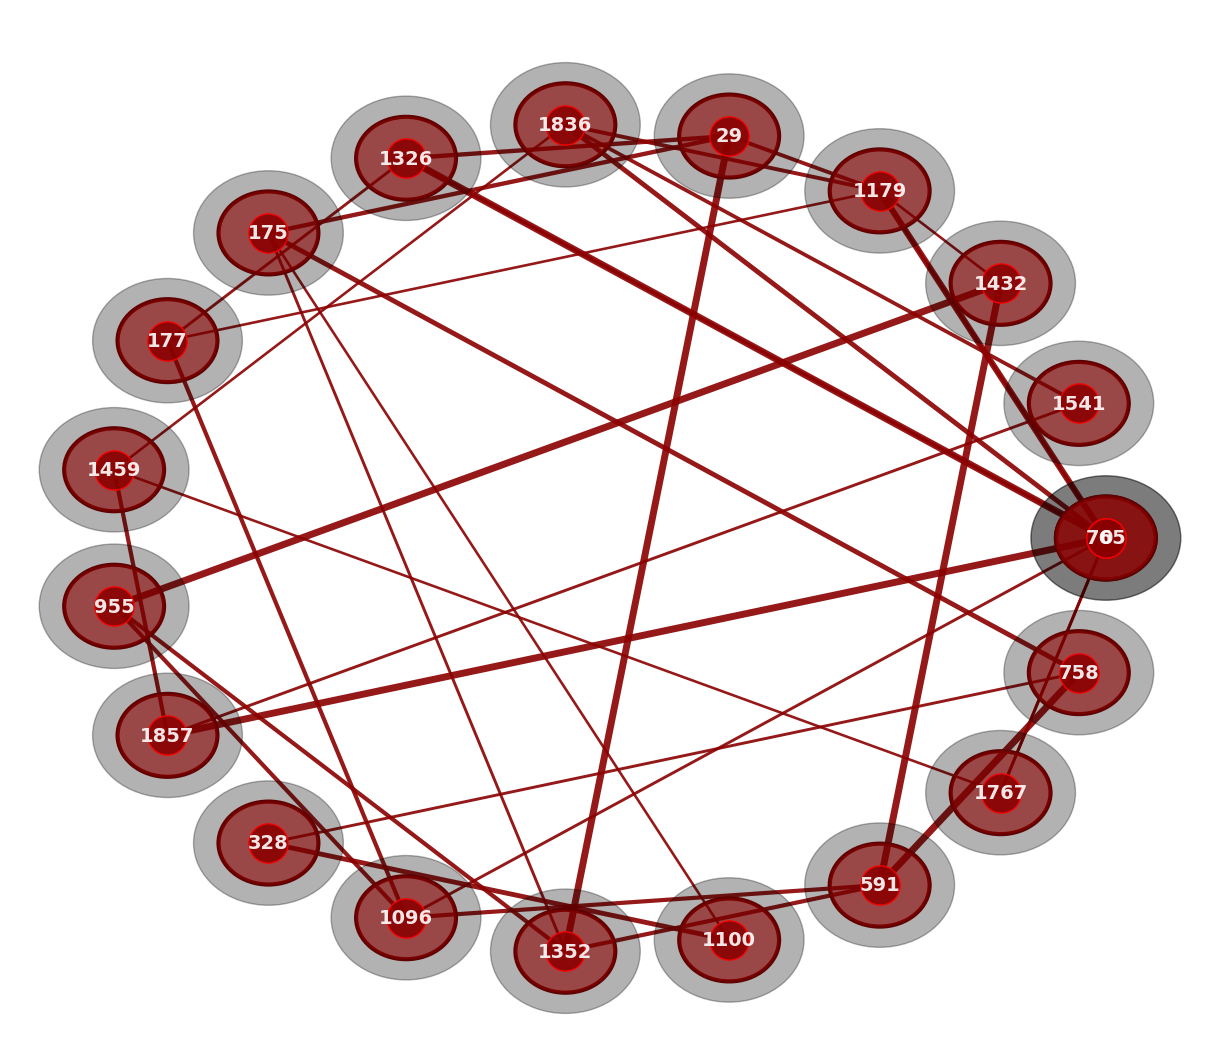

In [229]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Seleccionar un componente conexo
nodos_conectados = list(nx.connected_components(G7))
componente_conexo = max(nodos_conectados, key=len)  # Seleccionamos el componente más grande

# Tomamos un subgrafo que contenga todos los nodos conectados
# Aquí seleccionamos el primer nodo aleatorio del componente
nodo_inicial = np.random.choice(list(componente_conexo))

# Inicializamos una lista de nodos conectados
nodos_conectados_aleatorios = [nodo_inicial]

# Agregamos nodos hasta que tengamos 20 nodos conectados
while len(nodos_conectados_aleatorios) < 20:
    nodo_actual = nodos_conectados_aleatorios[-1]
    vecinos = list(G7.neighbors(nodo_actual))  # Vecinos del nodo actual
    nodo_aleatorio = np.random.choice(vecinos)  # Escoger un vecino aleatorio
    if nodo_aleatorio not in nodos_conectados_aleatorios:
        nodos_conectados_aleatorios.append(nodo_aleatorio)

# Crear el subgrafo con los nodos seleccionados
G_subgrafo = G7.subgraph(nodos_conectados_aleatorios).copy()

# Configuración avanzada de la visualización
# Usamos una distribución en espiral, ajustando el ángulo entre los nodos
theta = np.linspace(0, 2*np.pi, len(G_subgrafo.nodes()))
pos = {node: (np.cos(t), np.sin(t)) for node, t in zip(G_subgrafo.nodes(), theta)}

# Gradiente de color en tonos oscuros de rojo para los bordes de los nodos
node_color = 'darkred'  # Fijamos un color rojo neutral para el centro de los nodos

# Definir el ancho de las aristas según el peso (si existe)
if nx.is_weighted(G_subgrafo):
    edges = G_subgrafo.edges(data=True)
    edge_weights = [d['weight'] for _, _, d in edges]
    width = [w / max(edge_weights) * 5 for w in edge_weights]  # Escala de grosor más marcado
else:
    width = [2] * len(G_subgrafo.edges())  # Si no hay pesos, mantener las aristas de grosor uniforme

# Tamaño de los nodos y texto
node_size = 800
font_size = 14
font_color = 'white'

# Figura y gráfico con fondo negro para un contraste mayor
plt.figure(figsize=(12, 10), facecolor='black')

# Dibujar el grafo con configuración avanzada
nx.draw(G_subgrafo, pos, with_labels=True, node_color=node_color, edge_color='darkred',
        node_size=node_size, font_size=font_size, font_color=font_color,
        width=width, font_weight='bold', cmap=plt.cm.Reds, alpha=0.9, edgecolors='red')

# Añadir bordes resaltados y sombras sutiles a los nodos
for node in G_subgrafo.nodes():
    x, y = pos[node]
    plt.gca().add_patch(plt.Circle((x, y), radius=0.1, color='darkred', lw=3, fill=False))
    # Añadir una sombra detrás de los nodos para crear un efecto de profundidad
    plt.gca().add_patch(plt.Circle((x, y), radius=0.15, color='black', alpha=0.3))

# Añadir una capa de brillo alrededor de los nodos (resplandor)
for node in G_subgrafo.nodes():
    x, y = pos[node]
    plt.gca().add_patch(plt.Circle((x, y), radius=0.1, color='darkred', lw=0, fill=True, alpha=0.6))

# Añadir título y mejorar detalles
plt.title('Visualización avanzada y estilizada del subgrafo de G7', fontsize=18, fontweight='bold', color='white')
plt.axis('off')  # Ocultar los ejes para que la imagen sea más limpia
plt.show()



In [230]:
# Filtrar solo las aristas con pesos numéricos y que sean tuplas
aristas_validas = []
for arista in aristas[0]:
    # Verificar si la arista es una tupla y tiene 3 elementos (nodo1, nodo2, peso)
    if isinstance(arista, tuple) and len(arista) == 3:
        nodo1, nodo2, peso = arista
        # Verificar si el peso es un valor numérico (int o float)
        if isinstance(peso, (int, float)):
            aristas_validas.append(arista)

# Ordenar todas las aristas por peso de forma descendente (mayor peso primero)
aristas_mayor_peso = sorted(aristas_validas, key=lambda x: x[2], reverse=True)[:10]

# Ordenar todas las aristas por peso de forma ascendente (menor peso primero)
aristas_menor_peso = sorted(aristas_validas, key=lambda x: x[2])[:10]

# Imprimir las 10 aristas con mayor peso
print("Las 10 conexiones con mayor peso:")
for arista in aristas_mayor_peso:
    print(f"{arista[0]} - {arista[1]} con peso: {arista[2]}")

# Imprimir las 10 aristas con menor peso
print("\nLas 10 conexiones con menor peso:")
for arista in aristas_menor_peso:
    print(f"{arista[0]} - {arista[1]} con peso: {arista[2]}")

Las 10 conexiones con mayor peso:
0 - 1900 con peso: 1
1 - 83 con peso: 1
2 - 593 con peso: 1
2 - 759 con peso: 1
2 - 1333 con peso: 1
2 - 1653 con peso: 1
2 - 1659 con peso: 1
2 - 1704 con peso: 1
2 - 1709 con peso: 1
2 - 1890 con peso: 1

Las 10 conexiones con menor peso:
59 - 1453 con peso: 0.05292
60 - 1453 con peso: 0.05292
1070 - 1453 con peso: 0.05292
10 - 1155 con peso: 0.06173999999999999
99 - 1178 con peso: 0.06173999999999999
81 - 497 con peso: 0.07408799999999999
81 - 1069 con peso: 0.07408799999999999
81 - 1178 con peso: 0.07408799999999999
86 - 992 con peso: 0.07408799999999999
98 - 1256 con peso: 0.07408799999999999


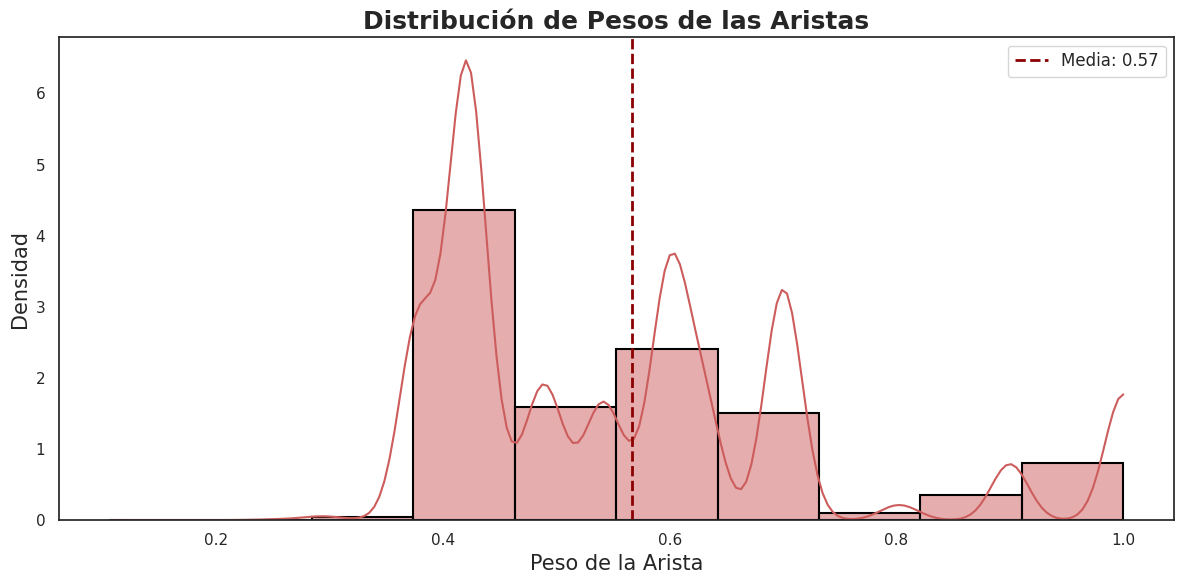

In [231]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Obtener los pesos de las aristas
pesos = [data.get('weight', 1) for u, v, data in G7.edges(data=True)]

# Configurar el estilo de Seaborn para un fondo limpio sin líneas
sns.set(style="white", palette="muted")

n_bins = 10

# Crear figura y ejes
plt.figure(figsize=(12, 6))

# Graficar el histograma con KDE superpuesto para una mejor visualización
sns.histplot(pesos, bins=n_bins, kde=True, color='indianred', edgecolor='black', stat="density", linewidth=1.5)

# Títulos y etiquetas con tamaños personalizados
plt.title('Distribución de Pesos de las Aristas', fontsize=18, fontweight='bold')
plt.xlabel('Peso de la Arista', fontsize=15)
plt.ylabel('Densidad', fontsize=15)

# Agregar una línea de referencia para la media con un estilo más notorio
mean_weight = np.mean(pesos)
plt.axvline(mean_weight, color='darkred', linestyle='--', linewidth=2, label=f'Media: {mean_weight:.2f}')

# Mejorar la visibilidad de la leyenda
plt.legend(loc='upper right', fontsize=12)

# Mejorar la visualización y ajustarla a la figura
plt.tight_layout()

# Mostrar el gráfico
plt.show()



In [232]:
# Contar cuántas conexiones tienen peso 1 en todas las aristas
conexiones_peso_1_total = sum(1 for arista in aristas_validas if arista[2] == 1)

# Imprimir el resultado
print(f"Cantidad total de conexiones con peso 1 en todas las aristas: {conexiones_peso_1_total}")



Cantidad total de conexiones con peso 1 en todas las aristas: 10817


In [233]:
# Crear un diccionario que mapea el id_nodo a los nombres de las prendas, colores y niveles
id_a_prenda_color_nivel = dict(zip(df_limpio_s7['id_nodo'], zip(df_limpio_s7['title'], df_limpio_s7['hexadecimal'], df_limpio_s7['nivel'])))

# Ahora, mapeamos las aristas de mayor y menor peso con nombres, colores y niveles de las prendas

# Obtener los nombres, colores y niveles de las prendas asociadas a cada arista de mayor peso
aristas_mayor_peso_con_nombres_colores_niveles = [
    (id_a_prenda_color_nivel.get(arista[0], (arista[0], 'Desconocido', 'Desconocido'))[0],
     id_a_prenda_color_nivel.get(arista[1], (arista[1], 'Desconocido', 'Desconocido'))[0],
     id_a_prenda_color_nivel.get(arista[0], (arista[0], 'Desconocido', 'Desconocido'))[1],
     id_a_prenda_color_nivel.get(arista[1], (arista[1], 'Desconocido', 'Desconocido'))[1],
     id_a_prenda_color_nivel.get(arista[0], (arista[0], 'Desconocido', 'Desconocido'))[2],
     id_a_prenda_color_nivel.get(arista[1], (arista[1], 'Desconocido', 'Desconocido'))[2],
     arista[2])
    for arista in aristas_mayor_peso
]

# Obtener los nombres, colores y niveles de las prendas asociadas a cada arista de menor peso
aristas_menor_peso_con_nombres_colores_niveles = [
    (id_a_prenda_color_nivel.get(arista[0], (arista[0], 'Desconocido', 'Desconocido'))[0],
     id_a_prenda_color_nivel.get(arista[1], (arista[1], 'Desconocido', 'Desconocido'))[0],
     id_a_prenda_color_nivel.get(arista[0], (arista[0], 'Desconocido', 'Desconocido'))[1],
     id_a_prenda_color_nivel.get(arista[1], (arista[1], 'Desconocido', 'Desconocido'))[1],
     id_a_prenda_color_nivel.get(arista[0], (arista[0], 'Desconocido', 'Desconocido'))[2],
     id_a_prenda_color_nivel.get(arista[1], (arista[1], 'Desconocido', 'Desconocido'))[2],
     arista[2])
    for arista in aristas_menor_peso
]

# Imprimir las aristas con nombres, colores y niveles de prendas
print("Las 10 conexiones con mayor peso y sus nombres de prendas, colores y niveles:")
for arista in aristas_mayor_peso_con_nombres_colores_niveles:
    print(f"{arista[0]} ({arista[2]}, {arista[4]}) - {arista[1]} ({arista[3]}, {arista[5]}) con peso: {arista[6]}")

print("\nLas 10 conexiones con menor peso y sus nombres de prendas, colores y niveles:")
for arista in aristas_menor_peso_con_nombres_colores_niveles:
    print(f"{arista[0]} ({arista[2]}, {arista[4]}) - {arista[1]} ({arista[3]}, {arista[5]}) con peso: {arista[6]}")



Las 10 conexiones con mayor peso y sus nombres de prendas, colores y niveles:
Poly Pant deeluxe (B11730, 1.1) - Cerise Jumpsuit solid  (800000, 3.1) con peso: 1
Long Tshirt stripe (ECE9D6, 3.0) - Limbo Scarf stola (000081, 3.2) con peso: 1
Turna Top flounce  (5F5E5E, 2.0) - Parastoo Pant comfort (DEB24C, 1.1) con peso: 1
Turna Top flounce  (5F5E5E, 2.0) - Kara Foulard closet (DEB24C, 3.2) con peso: 1
Turna Top flounce  (5F5E5E, 2.0) - Cooler Pant ycoo  (DEB24C, 1.1) con peso: 1
Turna Top flounce  (5F5E5E, 2.0) - Tess Bag cahier  (DEB24C, 3.2) con peso: 1
Turna Top flounce  (5F5E5E, 2.0) - Syna Bag cahier  (DEB24C, 3.2) con peso: 1
Turna Top flounce  (5F5E5E, 2.0) - Radia Pant five  (DEB24C, 1.1) con peso: 1
Turna Top flounce  (5F5E5E, 2.0) - Sarah Pant short  (DEB24C, 1.1) con peso: 1
Turna Top flounce  (5F5E5E, 2.0) - Nadia Sweater neck  (DEB24C, 3.0) con peso: 1

Las 10 conexiones con menor peso y sus nombres de prendas, colores y niveles:
Masha Tshirt tee (ECE9D6, 2.0) - Gilet Cardi

**Análisis del grafo**

In [234]:
# Obtener nodos aislados
nodos_aislados = list(nx.isolates(G7))

# Imprimir nodos aislados con sus características
if nodos_aislados:
    print("Nodos aislados y sus características:")
    for nodo in nodos_aislados:
        print(f"Nodo: {nodo}")
        print(f"Características: {G7.nodes[nodo]}")
        print("-" * 40)  # Separador para mayor claridad
else:
    print("No hay nodos aislados en el grafo.")


No hay nodos aislados en el grafo.


In [235]:
import networkx as nx

def analizar_grafo(G):
    analysis = {}

    # Número de nodos y aristas
    analysis['nodos'] = G.number_of_nodes()  # Total de nodos en el grafo
    analysis['aristas'] = G.number_of_edges()  # Total de aristas en el grafo

    # Densidad del grafo
    analysis['densidad'] = nx.density(G)  # Proporción de aristas existentes respecto al máximo posible

    # Componentes conectadas
    componentes = list(nx.connected_components(G))  # Encuentra componentes conectadas
    analysis['componentes_conectadas'] = len(componentes)  # Número de componentes conectadas
    analysis['tamaño_componentes'] = [len(c) for c in componentes]  # Tamaños de cada componente conectada

    # Tamaño de la componente gigante
    analysis['tamaño_componente_gigante'] = max(analysis['tamaño_componentes']) if componentes else 0  # Tamaño de la componente gigante

    # Diámetro (solo si el grafo es conexo)
    if nx.is_connected(G):  # Verifica si el grafo es conexo
        analysis['diametro'] = nx.diameter(G)  # El diámetro es la distancia más larga entre dos nodos
    else:
        analysis['diametro'] = "No aplica (grafo no conexo)"  # Si el grafo no es conexo, no tiene diámetro

    # Coeficiente de agrupamiento promedio
    analysis['coeficiente_agrupamiento'] = nx.average_clustering(G)

    # Grado promedio
    grados = dict(G.degree())  # Obtiene los grados de los nodos
    analysis['grado_promedio'] = sum(grados.values()) / analysis['nodos'] if analysis['nodos'] > 0 else 0  # Promedio de los grados

    # Centralidad de grado
    centralidad_grado = nx.degree_centrality(G)  # Centralidad de grado indica la importancia de un nodo por su número de conexiones
    analysis['centralidad_grado_max'] = max(centralidad_grado.values())  # Nodo más central según la centralidad de grado
    analysis['centralidad_grado_min'] = min(centralidad_grado.values())  # Nodo con menor centralidad de grado
    analysis['centralidad_grado_prom'] = sum(centralidad_grado.values()) / len(centralidad_grado) if len(centralidad_grado) > 0 else 0  # Promedio de centralidad de grado

    # Centralidad de intermediación (betweenness centrality)
    centralidad_intermediacion = nx.betweenness_centrality(G)
    analysis['centralidad_intermediacion_max'] = max(centralidad_intermediacion.values())  # Nodo con mayor centralidad de intermediación
    analysis['centralidad_intermediacion_min'] = min(centralidad_intermediacion.values())  # Nodo con menor centralidad de intermediación
    analysis['centralidad_intermediacion_prom'] = sum(centralidad_intermediacion.values()) / len(centralidad_intermediacion) if len(centralidad_intermediacion) > 0 else 0  # Promedio de centralidad de intermediación

    # Centralidad de cercanía (closeness centrality)
    centralidad_cercania = nx.closeness_centrality(G)  # Mide la proximidad de un nodo a todos los demás
    analysis['centralidad_cercania_max'] = max(centralidad_cercania.values())  # Nodo con mayor centralidad de cercanía
    analysis['centralidad_cercania_min'] = min(centralidad_cercania.values())  # Nodo con menor centralidad de cercanía
    analysis['centralidad_cercania_prom'] = sum(centralidad_cercania.values()) / len(centralidad_cercania) if len(centralidad_cercania) > 0 else 0  # Promedio de centralidad de cercanía

    # PageRank
    pagerank = nx.pagerank(G)  # Mide la importancia de los nodos basándose en los enlaces, similar al algoritmo de Google
    analysis['pagerank_max'] = max(pagerank.values())  # Nodo con mayor PageRank
    analysis['pagerank_min'] = min(pagerank.values())  # Nodo con menor PageRank
    analysis['pagerank_prom'] = sum(pagerank.values()) / len(pagerank) if len(pagerank) > 0 else 0  # Promedio de PageRank

    # Excentricidad
    excentricidad = nx.eccentricity(G)  # Mide la distancia máxima de un nodo a cualquier otro nodo en el grafo
    analysis['excentricidad_max'] = max(excentricidad.values())  # Nodo con la mayor excentricidad
    analysis['excentricidad_min'] = min(excentricidad.values())  # Nodo con la menor excentricidad
    analysis['excentricidad_prom'] = sum(excentricidad.values()) / len(excentricidad) if len(excentricidad) > 0 else 0  # Promedio de excentricidad

    # Triángulos
    triangulos = nx.triangles(G)  # Calcula cuántos triángulos tiene cada nodo
    top_5_triangulos = sorted(triangulos.items(), key=lambda x: x[1], reverse=True)[:5]  # Top 5 nodos con más triángulos
    bottom_5_triangulos = sorted(triangulos.items(), key=lambda x: x[1])[:5]  # Top 5 nodos con menos triángulos

    print("\nTop 5 nodos con más triángulos:")
    for nodo, cantidad in top_5_triangulos:
        print(f"Nodo {nodo}: {cantidad} triángulos")

    print("\nTop 5 nodos con menos triángulos:")
    for nodo, cantidad in bottom_5_triangulos:
        print(f"Nodo {nodo}: {cantidad} triángulos")

    # Imprimir resultados
    print(f"Densidad: {analysis['densidad']}")
    print(f"Centralidad de grado - Max: {analysis['centralidad_grado_max']}, Min: {analysis['centralidad_grado_min']}, Prom: {analysis['centralidad_grado_prom']}")
    print(f"Centralidad de intermediación - Max: {analysis['centralidad_intermediacion_max']}, Min: {analysis['centralidad_intermediacion_min']}, Prom: {analysis['centralidad_intermediacion_prom']}")
    print(f"Centralidad de cercanía - Max: {analysis['centralidad_cercania_max']}, Min: {analysis['centralidad_cercania_min']}, Prom: {analysis['centralidad_cercania_prom']}")
    print(f"PageRank - Max: {analysis['pagerank_max']}, Min: {analysis['pagerank_min']}, Prom: {analysis['pagerank_prom']}")
    print(f"Excentricidad - Max: {analysis['excentricidad_max']}, Min: {analysis['excentricidad_min']}, Prom: {analysis['excentricidad_prom']}")
    print(f"Número de nodos: {analysis['nodos']}")
    print(f"Número de aristas: {analysis['aristas']}")
    print(f"Componentes conectadas: {analysis['componentes_conectadas']}")
    print(f"Tamaño de componentes: {analysis['tamaño_componentes']}")
    print(f"Tamaño de la componente gigante: {analysis['tamaño_componente_gigante']}")
    print(f"Diámetro: {analysis['diametro']}")
    print(f"Coeficiente de agrupamiento: {analysis['coeficiente_agrupamiento']}")
    print(f"Grado promedio: {analysis['grado_promedio']}")

    return analysis



In [236]:
analisis = analizar_grafo(G7)
analisis



Top 5 nodos con más triángulos:
Nodo 1651: 21507 triángulos
Nodo 1901: 19922 triángulos
Nodo 1661: 18041 triángulos
Nodo 73: 16445 triángulos
Nodo 1654: 16404 triángulos

Top 5 nodos con menos triángulos:
Nodo 2: 0 triángulos
Nodo 6: 0 triángulos
Nodo 8: 0 triángulos
Nodo 9: 0 triángulos
Nodo 11: 0 triángulos
Densidad: 0.08118385089201695
Centralidad de grado - Max: 0.3896982310093653, Min: 0.0005202913631633715, Prom: 0.08118385089201703
Centralidad de intermediación - Max: 0.013738082984983394, Min: 0.0, Prom: 0.0005588296644584022
Centralidad de cercanía - Max: 0.6105463786531131, Min: 0.23840238154304144, Prom: 0.4862724889438275
PageRank - Max: 0.002686595816516337, Min: 7.998173703011991e-05, Prom: 0.0005200208008320337
Excentricidad - Max: 5, Min: 3, Prom: 4.246489859594384
Número de nodos: 1923
Número de aristas: 150028
Componentes conectadas: 1
Tamaño de componentes: [1923]
Tamaño de la componente gigante: 1923
Diámetro: 5
Coeficiente de agrupamiento: 0.10195715620653223
Grad

{'nodos': 1923,
 'aristas': 150028,
 'densidad': 0.08118385089201695,
 'componentes_conectadas': 1,
 'tamaño_componentes': [1923],
 'tamaño_componente_gigante': 1923,
 'diametro': 5,
 'coeficiente_agrupamiento': 0.10195715620653223,
 'grado_promedio': 156.0353614144566,
 'centralidad_grado_max': 0.3896982310093653,
 'centralidad_grado_min': 0.0005202913631633715,
 'centralidad_grado_prom': 0.08118385089201703,
 'centralidad_intermediacion_max': 0.013738082984983394,
 'centralidad_intermediacion_min': 0.0,
 'centralidad_intermediacion_prom': 0.0005588296644584022,
 'centralidad_cercania_max': 0.6105463786531131,
 'centralidad_cercania_min': 0.23840238154304144,
 'centralidad_cercania_prom': 0.4862724889438275,
 'pagerank_max': 0.002686595816516337,
 'pagerank_min': 7.998173703011991e-05,
 'pagerank_prom': 0.0005200208008320337,
 'excentricidad_max': 5,
 'excentricidad_min': 3,
 'excentricidad_prom': 4.246489859594384}

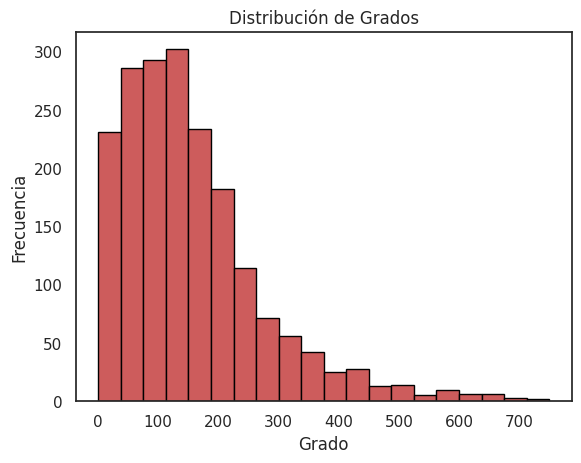

In [237]:
import matplotlib.pyplot as plt

grados = dict(G7.degree())
plt.hist(list(grados.values()), bins=20, edgecolor='black', color='indianred')
plt.title('Distribución de Grados')
plt.xlabel('Grado')
plt.ylabel('Frecuencia')
plt.show()

In [238]:
num_triangulos = sum(nx.triangles(G7).values()) // 3  # Dividir por 3 porque cada triángulo se cuenta 3 veces
print(f"Número de triángulos: {num_triangulos}")



Número de triángulos: 1172645


In [239]:
# Función para analizar componentes conectadas
def analizar_componentes_aisladas(G):
    # Obtener las componentes conectadas
    componentes = list(nx.connected_components(G))

    # Filtrar componentes de tamaño 1 (nodos aislados)
    nodos_aislados = [c for c in componentes if len(c) == 1]
    componentes_no_aisladas = [c for c in componentes if len(c) > 1]

    print(f"Total de componentes: {len(componentes)}")
    print(f"Componentes aisladas (tamaño 1): {len(nodos_aislados)}")
    print(f"Componentes no aisladas: {len(componentes_no_aisladas)}")
    print(f"Tamaños de las componentes no aisladas: {[len(c) for c in componentes_no_aisladas]}")

    return nodos_aislados, componentes_no_aisladas

# Aplicar el análisis
if __name__ == "__main__":
    nodos_aislados, componentes_no_aisladas = analizar_componentes_aisladas(G7)


Total de componentes: 1
Componentes aisladas (tamaño 1): 0
Componentes no aisladas: 1
Tamaños de las componentes no aisladas: [1923]


**TRIÁNGULOS**

In [240]:
import numpy as np
from itertools import combinations

def media_geometrica(lista):
    """Calcula la media geométrica de una lista de números."""
    return np.exp(np.mean(np.log(lista)))

def obtener_triangulos_y_media_geometrica(G):
    triangulos = []  # Lista para almacenar los triángulos con sus medias geométricas

    # Iteramos sobre todos los nodos
    for nodo in G.nodes():
        # Obtenemos los vecinos del nodo
        vecinos = list(G.neighbors(nodo))

        # Generamos combinaciones de pares de vecinos
        for vecino1, vecino2 in combinations(vecinos, 2):
            # Comprobamos si existe una arista entre los dos vecinos, formando un triángulo
            if G.has_edge(vecino1, vecino2):
                # Si existe un triángulo, guardamos los tres nodos y la media geométrica de las ponderaciones
                ponderaciones = [G[nodo][vecino1].get('weight', 1),
                                 G[nodo][vecino2].get('weight', 1),
                                 G[vecino1][vecino2].get('weight', 1)]
                media = media_geometrica(ponderaciones)
                triangulos.append(((nodo, vecino1, vecino2), media))

    return triangulos



In [241]:
triangulos = obtener_triangulos_y_media_geometrica(G7)

In [242]:
def es_valido_triangulo(nodo1, nodo2, nodo3, G):
    """Verifica si el triángulo cumple con las condiciones del 'look' basadas en los niveles de las prendas."""

    # Extraemos los niveles de las prendas del cuarto atributo de cada nodo
    nivel1 = G.nodes[nodo1].get('feature', [])[3]  # El cuarto atributo es el nivel
    nivel2 = G.nodes[nodo2].get('feature', [])[3]  # El cuarto atributo es el nivel
    nivel3 = G.nodes[nodo3].get('feature', [])[3]  # El cuarto atributo es el nivel

    # Si alguno de los nodos no tiene un 'nivel_prenda' válido, el triángulo no es válido
    if nivel1 is None or nivel2 is None or nivel3 is None:
        return False

    # Si hay un nivel 1.2, las otras dos prendas deben ser 3.x y de subniveles distintos
    if nivel1 == 1.2 or nivel2 == 1.2 or nivel3 == 1.2:
        niveles_restantes = [nivel for nivel in [nivel1, nivel2, nivel3] if nivel != 1.2]
        if sorted(niveles_restantes) != [3.0, 3.1]:  # Los niveles restantes deben ser 3.x y distintos
            return False
    else:
        # Si no hay nivel 1.2, debe haber un nodo de cada nivel (1.1, 1.2, 2.x o 3.x)
        niveles = [nivel1, nivel2, nivel3]
        if len(set(niveles)) != 3:  # Todos los niveles deben ser diferentes
            return False
        # Verificar que hay al menos un nivel de cada tipo: 1.x, 2.x, 3.x
        if not any(nivel in [1.1, 1.2] for nivel in niveles) or not any(nivel == 2.0 for nivel in niveles) or not any(nivel >= 3.0 for nivel in niveles):
            return False

    return True

# Filtrar los triángulos que no cumplen con las condiciones de un 'look' válido
triangulos_validos = [triangulo for triangulo in triangulos
                      if es_valido_triangulo(*triangulo[0], G7)]

# Imprimir los triángulos válidos
print(f"Total de looks válidos: {len(triangulos_validos) //3}")


Total de looks válidos: 648619


In [243]:
# Crear un diccionario que mapea el id_nodo a los nombres de las prendas, colores y niveles
id_a_prenda_color_nivel = dict(zip(df_limpio_s7['id_nodo'], zip(df_limpio_s7['title'], df_limpio_s7['hexadecimal'], df_limpio_s7['nivel'])))

# Ordenar los triángulos en base a la media geométrica (de mayor a menor)
triangulos_ordenados = sorted(triangulos_validos, key=lambda x: x[1], reverse=True)

# Crear una lista para almacenar todos los triángulos ordenados
resultados_completos = []

# Guardar todos los triángulos ordenados en la lista
for triangulo, media in triangulos_ordenados:
    # Obtener los nombres, colores y niveles de las prendas asociadas a los nodos del triángulo
    prenda1, prenda2, prenda3 = triangulo
    prenda1_nombre, prenda1_color, prenda1_nivel = id_a_prenda_color_nivel.get(prenda1, ('Desconocido', 'Desconocido', 'Desconocido'))
    prenda2_nombre, prenda2_color, prenda2_nivel = id_a_prenda_color_nivel.get(prenda2, ('Desconocido', 'Desconocido', 'Desconocido'))
    prenda3_nombre, prenda3_color, prenda3_nivel = id_a_prenda_color_nivel.get(prenda3, ('Desconocido', 'Desconocido', 'Desconocido'))

    # Guardar el triángulo y su media geométrica en la lista de resultados completos
    resultado = (prenda1_nombre, prenda1_color, prenda1_nivel,
                 prenda2_nombre, prenda2_color, prenda2_nivel,
                 prenda3_nombre, prenda3_color, prenda3_nivel,
                 media)
    resultados_completos.append(resultado)

# Ordenar los resultados completos por la media geométrica (de mayor a menor)
resultados_completos_ordenados = sorted(resultados_completos, key=lambda x: x[9], reverse=True)

# Los 10 mejores triángulos (top 10)
top10_triangulos = resultados_completos_ordenados[:10]

# Imprimir los 10 mejores triángulos con nombres, colores y niveles de las prendas
print("Top 10 mejores triángulos con nombres, colores y niveles de prendas:")
for resultado in top10_triangulos:
    prenda1_nombre, prenda1_color, prenda1_nivel, \
    prenda2_nombre, prenda2_color, prenda2_nivel, \
    prenda3_nombre, prenda3_color, prenda3_nivel, media = resultado

    # Imprimir el triángulo con la media geométrica y detalles de las prendas
    print(f"({prenda1_nombre}, {prenda1_color}), "
          f"({prenda2_nombre}, {prenda2_color}), "
          f"({prenda3_nombre}, {prenda3_color}), "
          f" Niveles: [{prenda1_nivel}, {prenda2_nivel}, {prenda3_nivel}] "
          f"Media geométrica de ponderaciones: {media:.4f}")


Top 10 mejores triángulos con nombres, colores y niveles de prendas:
(Lunce Top colors , 000000), (Aitana Jacket moon, 00008b), (Summ Skirt onado , BBE2AD),  Niveles: [2.0, 3.1, 1.1] Media geométrica de ponderaciones: 1.0000
(Lunce Top colors , 000000), (Aitana Jacket moon, 00008b), (Summ Skirt onado , E65A5B),  Niveles: [2.0, 3.1, 1.1] Media geométrica de ponderaciones: 1.0000
(Lunce Top colors , 000000), (Square Sweater grace , DFC8B2), (Onlfloria Skirt short , 00008b),  Niveles: [2.0, 3.0, 1.1] Media geométrica de ponderaciones: 1.0000
(Lunce Top colors , 000000), (Square Sweater grace , DFC8B2), (Nairobi Skirt sage , 40E0D0),  Niveles: [2.0, 3.0, 1.1] Media geométrica de ponderaciones: 1.0000
(Lunce Top colors , 000000), (Square Sweater grace , DFC8B2), (Vicommit Skirt noos, 000081),  Niveles: [2.0, 3.0, 1.1] Media geométrica de ponderaciones: 1.0000
(Lunce Top colors , 000000), (Square Sweater grace , DFC8B2), (Dena Skirt solid, 00008b),  Niveles: [2.0, 3.0, 1.1] Media geométrica 

In [244]:
# Iterar sobre los triángulos del top 10
for triangulo, media in top10_triangulos:
    prenda1, prenda2, prenda3 = triangulo

    # Buscar las filas correspondientes a cada prenda en df_limpio_s7 usando 'id_nodo'
    prenda1_fila = df_limpio_s7[df_limpio_s7['id_nodo'] == prenda1]
    prenda2_fila = df_limpio_s7[df_limpio_s7['id_nodo'] == prenda2]
    prenda3_fila = df_limpio_s7[df_limpio_s7['id_nodo'] == prenda3]

    # Crear un DataFrame con las tres filas de prendas y añadir la media geométrica
    triangulo_info = pd.concat([prenda1_fila, prenda2_fila, prenda3_fila])
    triangulo_info['media_geometrica'] = media

    # Mostrar el DataFrame de cada triángulo
    display(triangulo_info)




ValueError: too many values to unpack (expected 2)

In [ ]:
import csv

def guardar_triangulos_en_csv(triangulos, archivo_csv):
    """Guarda los triángulos y sus medias geométricas en un archivo CSV."""
    with open(archivo_csv, mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['Nodo1', 'Nodo2', 'Nodo3', 'Media Geometrica'])  # Cabecera del CSV

        for triangulo, media in triangulos:
            writer.writerow([triangulo[0], triangulo[1], triangulo[2], media])  # Escribe los triángulos y medias

ruta_csv = '/content/drive/My Drive/Colab Notebooks/GRAFO RETO/Datos/transformados/triangulos_validos.csv'
guardar_triangulos_en_csv(triangulos_validos, ruta_csv)
